In [5]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)

# **DATA CLEANING**

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [12]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [13]:
penguins.shape

(344, 8)

In [14]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [15]:
penguins = penguins.drop_duplicates()
print("Remaining rows after dropping duplicates:", len(penguins))

Remaining rows after dropping duplicates: 344


In [16]:
penguins = penguins.dropna()

# **LABEL ENCODING**

In [17]:
# Label encoding
le = LabelEncoder()
penguins['species_encoded'] = le.fit_transform(penguins['species'])
penguins['island_encoded'] = le.fit_transform(penguins['island'])
penguins['sex_encoded'] = le.fit_transform(penguins['sex'])

# **OUTLIER DETECTION**

In [18]:
# Outlier detection function
def detect_outliers(df, column):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < 3]

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_columns:
    penguins = detect_outliers(penguins, col)

# **UNIVARIATE ANALYSIS**

## Numerical Variables

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(penguins[numerical_columns].describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


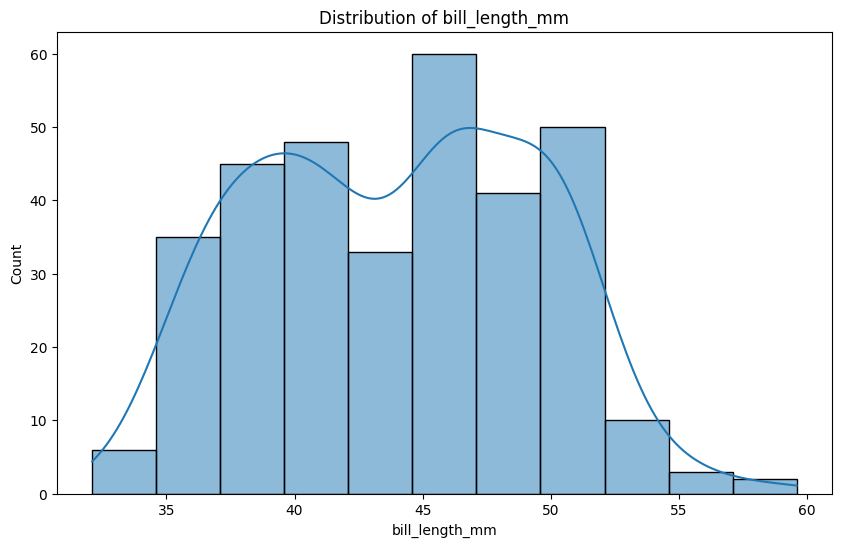

bill_length_mm - Mean: 43.99, SD: 5.47


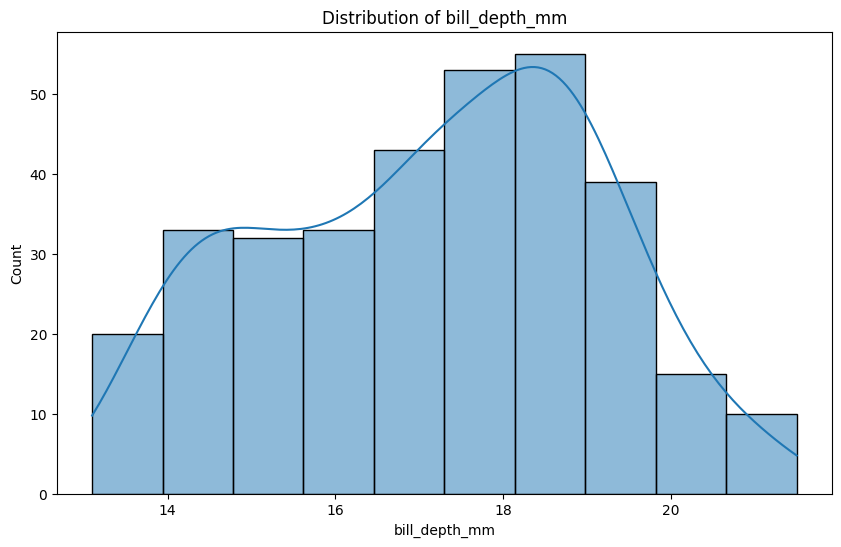

bill_depth_mm - Mean: 17.16, SD: 1.97


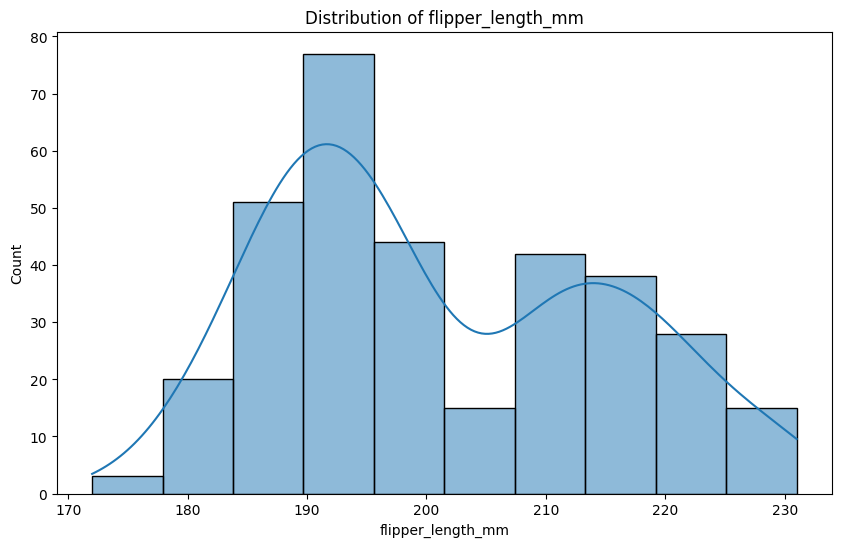

flipper_length_mm - Mean: 200.97, SD: 14.02


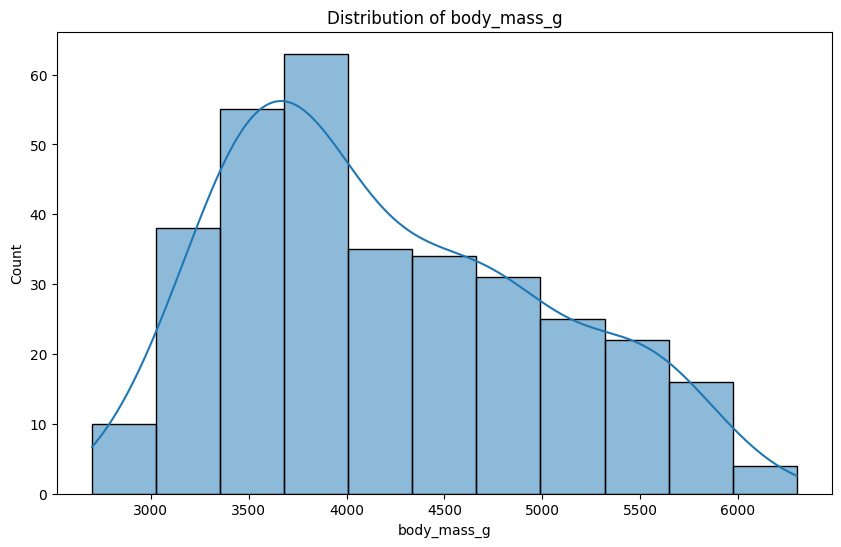

body_mass_g - Mean: 4207.06, SD: 805.22


In [20]:
#Numerical Variables
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(penguins[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    print(f"{col} - Mean: {penguins[col].mean():.2f}, SD: {penguins[col].std():.2f}")

## Measures of Central Tendency

In [21]:
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    print(f"{col}:")
    print(f"Mean: {penguins[col].mean():.2f}")
    print(f"Median: {penguins[col].median():.2f}")
    print(f"Mode: {penguins[col].mode()[0]:.2f}\n")

bill_length_mm:
Mean: 43.99
Median: 44.50
Mode: 41.10

bill_depth_mm:
Mean: 17.16
Median: 17.30
Mode: 17.00

flipper_length_mm:
Mean: 200.97
Median: 197.00
Mode: 190.00

body_mass_g:
Mean: 4207.06
Median: 4050.00
Mode: 3800.00



## Measures of Dispersion

In [22]:
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    print(f"{col}:")
    print(f"Range: {penguins[col].max() - penguins[col].min():.2f}")
    print(f"Variance: {penguins[col].var():.2f}")
    print(f"Coefficient of Variation: {(penguins[col].std() / penguins[col].mean()) * 100:.2f}%\n")

bill_length_mm:
Range: 27.50
Variance: 29.91
Coefficient of Variation: 12.43%

bill_depth_mm:
Range: 8.40
Variance: 3.88
Coefficient of Variation: 11.47%

flipper_length_mm:
Range: 59.00
Variance: 196.44
Coefficient of Variation: 6.97%

body_mass_g:
Range: 3600.00
Variance: 648372.49
Coefficient of Variation: 19.14%



## Box Plots for Numerical Variables

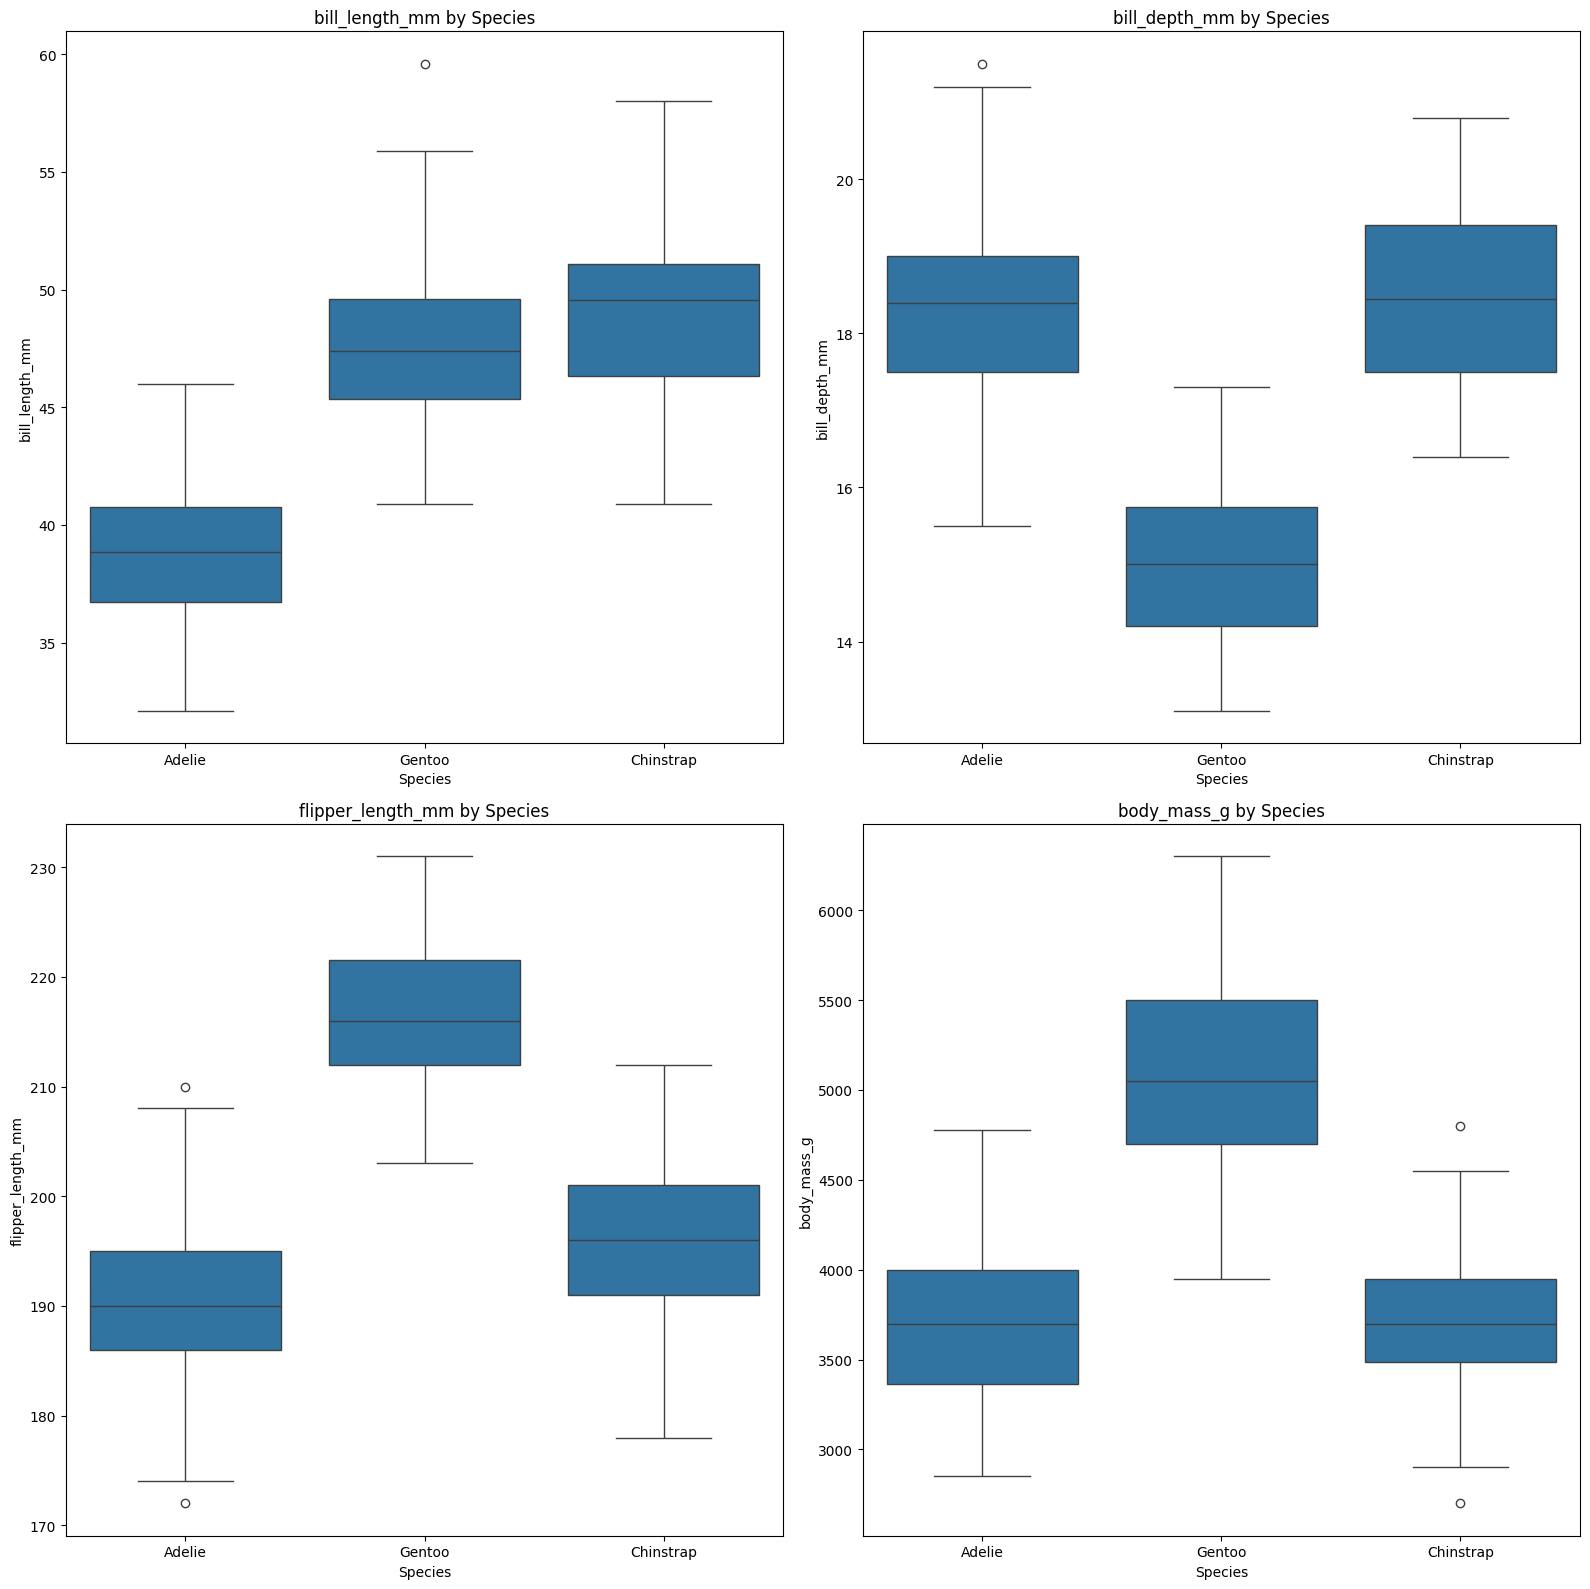

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    sns.boxplot(data=penguins, x='species', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Violin Plots for Numerical Variables

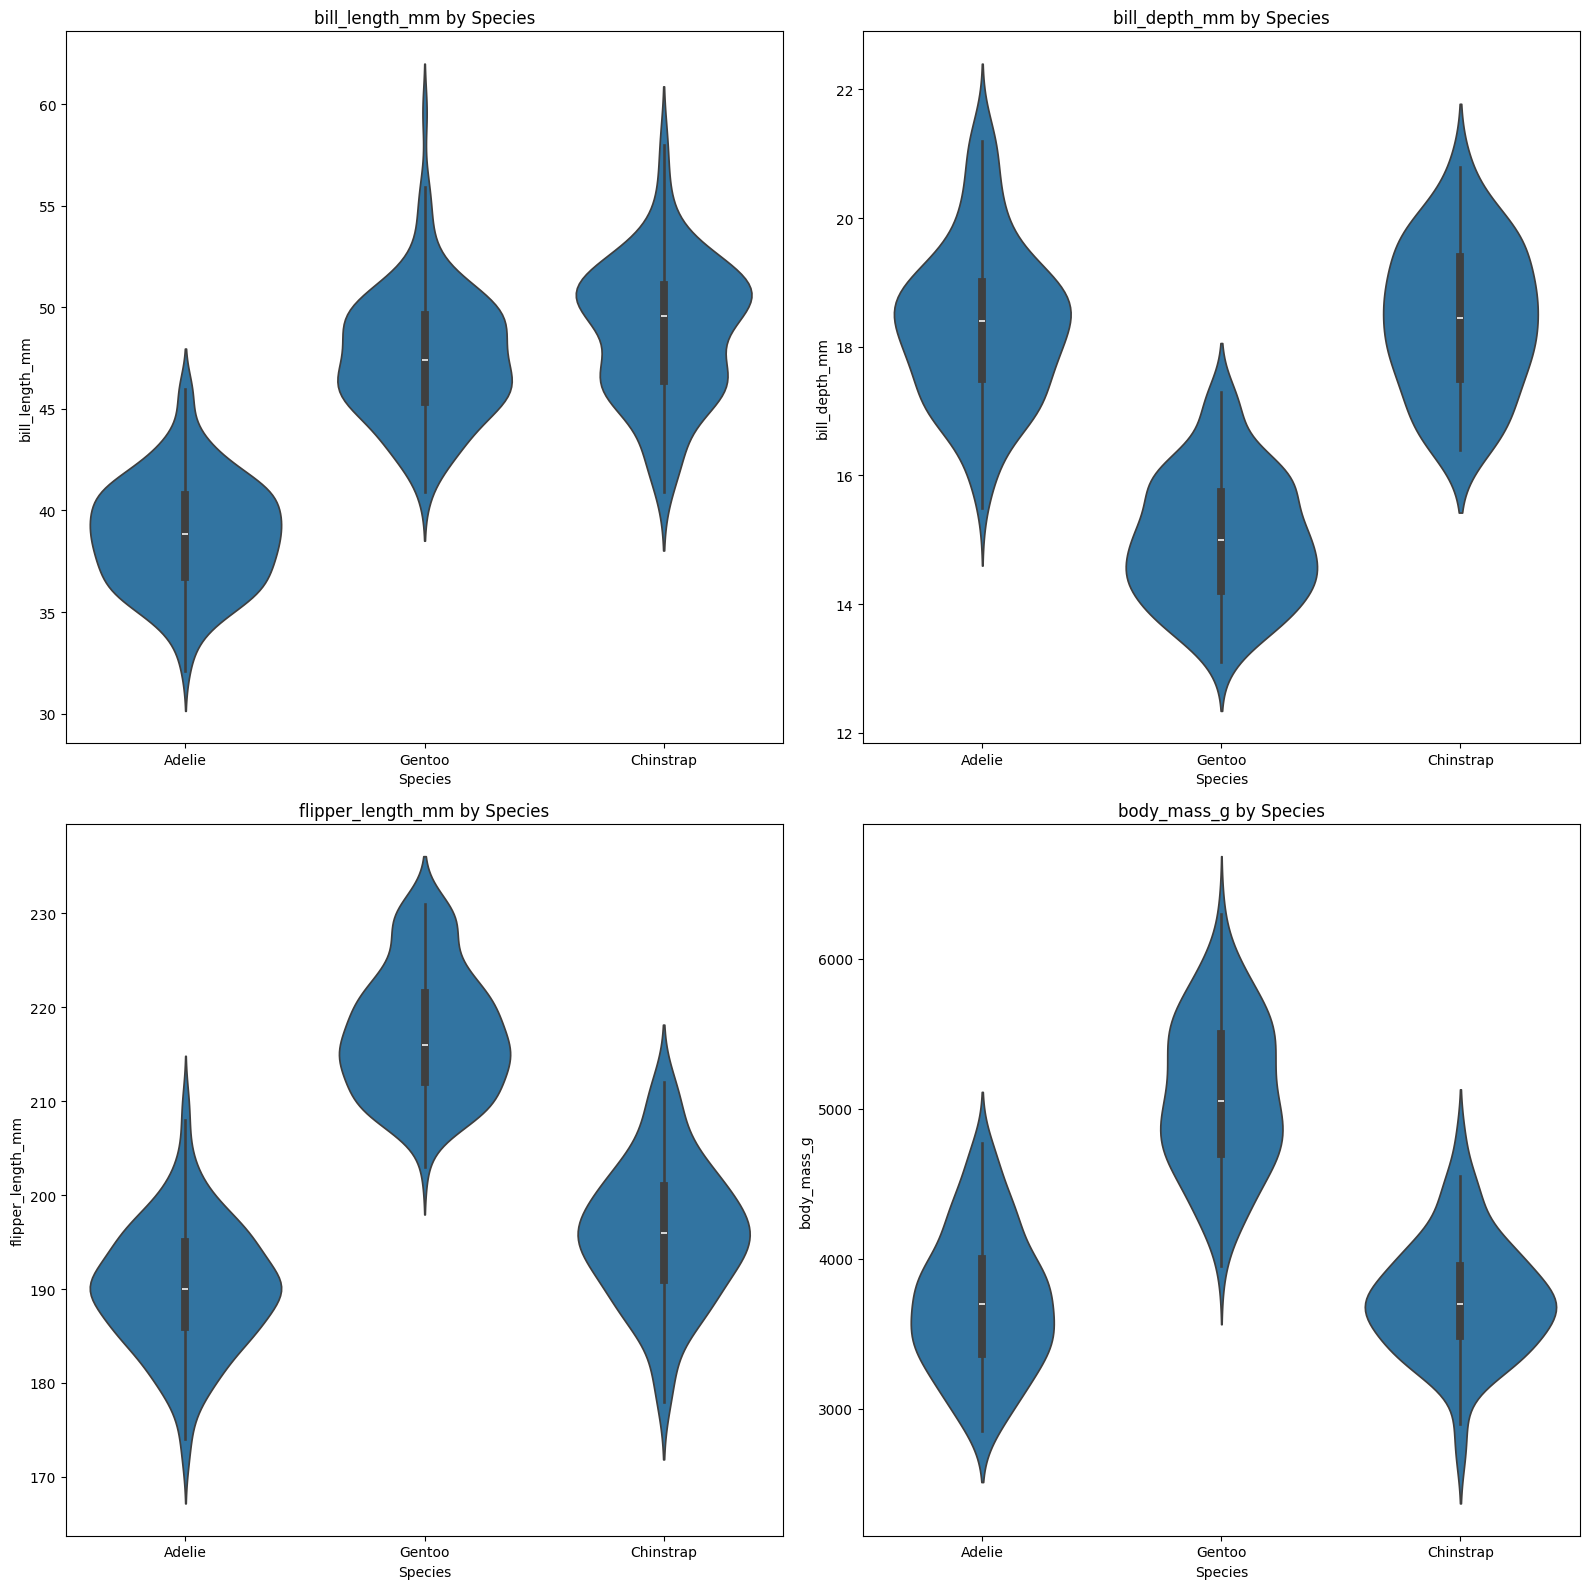

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    sns.violinplot(data=penguins, x='species', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Categorical Variable Visualization

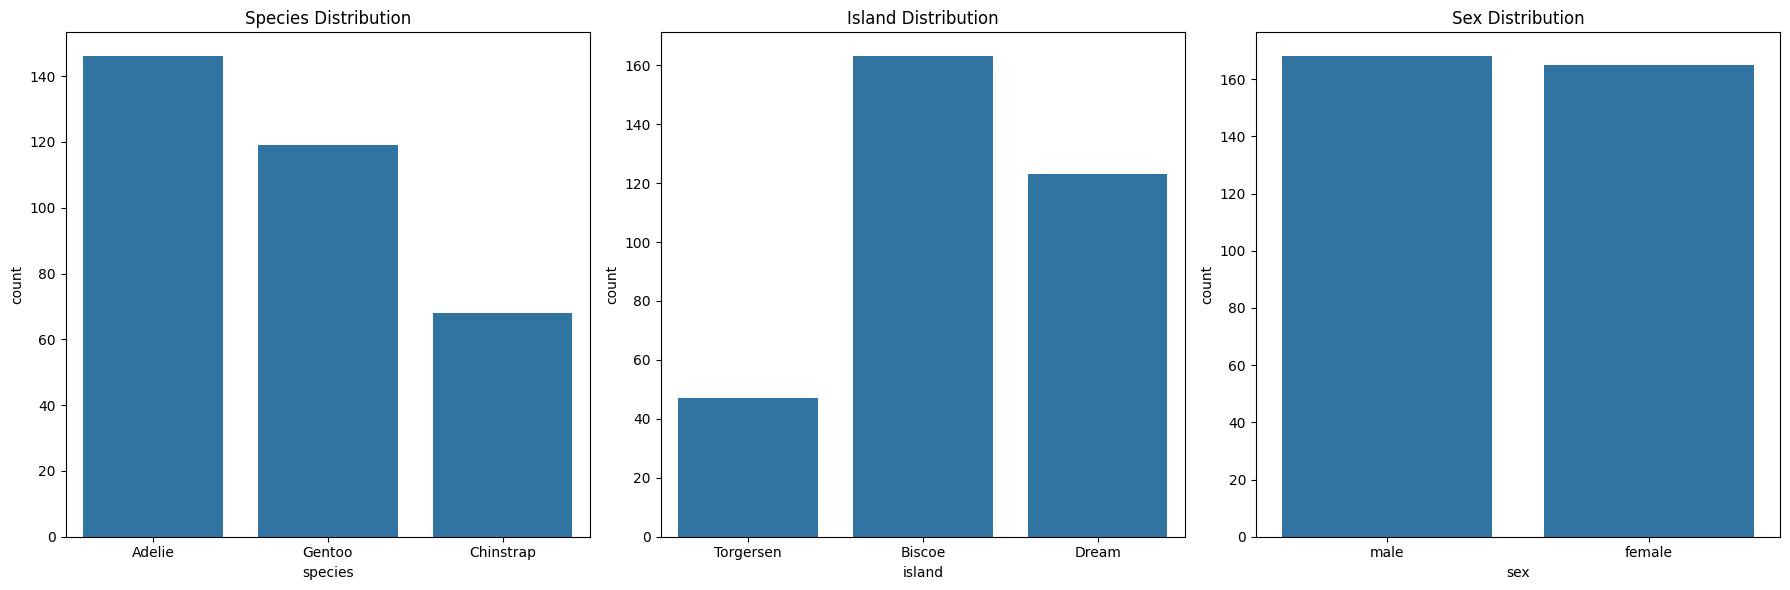

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=penguins, x='species', ax=axes[0])
axes[0].set_title('Species Distribution')

sns.countplot(data=penguins, x='island', ax=axes[1])
axes[1].set_title('Island Distribution')

sns.countplot(data=penguins, x='sex', ax=axes[2])
axes[2].set_title('Sex Distribution')

plt.tight_layout()
plt.show()


## Skewness and Kurtosis

In [26]:
from scipy.stats import skew, kurtosis

for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    print(f"{col}:")
    print(f"Skewness: {skew(penguins[col]):.2f}")
    print(f"Kurtosis: {kurtosis(penguins[col]):.2f}\n")


bill_length_mm:
Skewness: 0.05
Kurtosis: -0.89

bill_depth_mm:
Skewness: -0.15
Kurtosis: -0.90

flipper_length_mm:
Skewness: 0.36
Kurtosis: -0.96

body_mass_g:
Skewness: 0.47
Kurtosis: -0.74



## Kernel Density Distribution

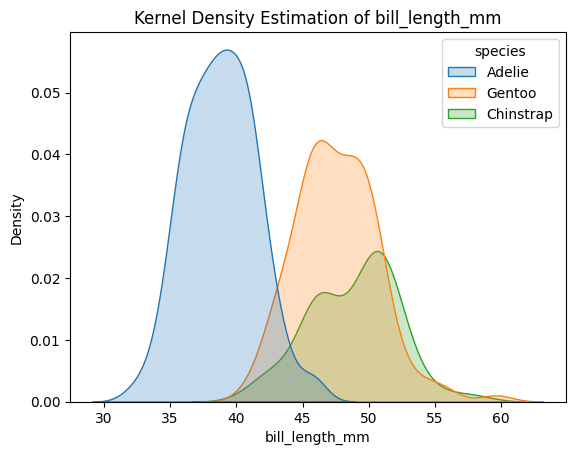

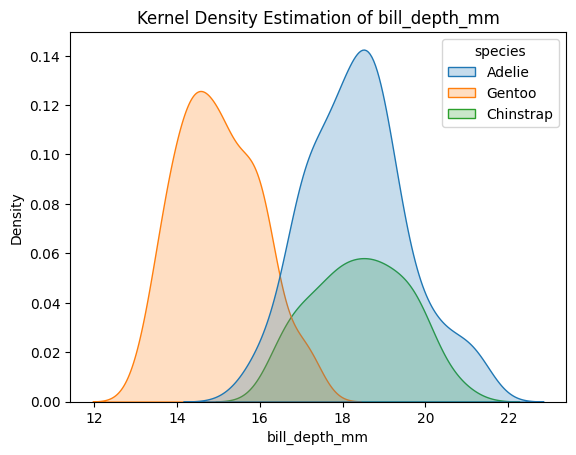

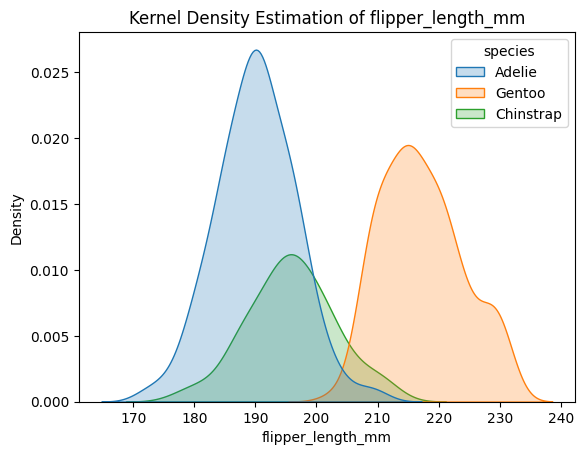

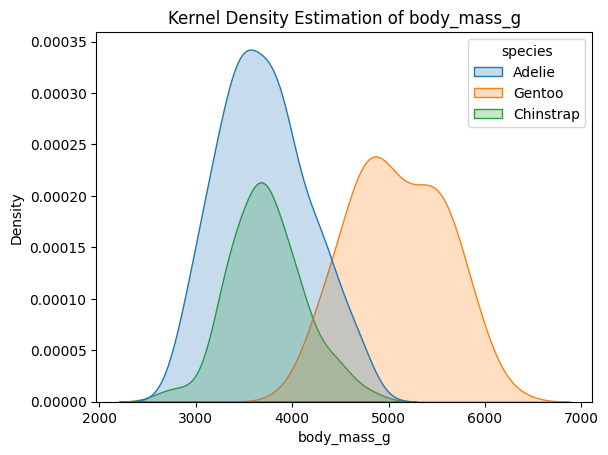

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.kdeplot(data=penguins, x=col, hue='species', fill=True)
    plt.title(f'Kernel Density Estimation of {col}')
    plt.show()


## Outliers using IQR

In [28]:
# Detect outliers using IQR
Q1 = penguins[numerical_columns].quantile(0.25)
Q3 = penguins[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside 1.5*IQR
outliers = ((penguins[numerical_columns] < (Q1 - 1.5 * IQR)) | (penguins[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


In [29]:
categorical_cols = ["species","island","sex"]

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:\n{penguins[col].value_counts()}\n")

Value counts for species:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Value counts for island:
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

Value counts for sex:
sex
male      168
female    165
Name: count, dtype: int64



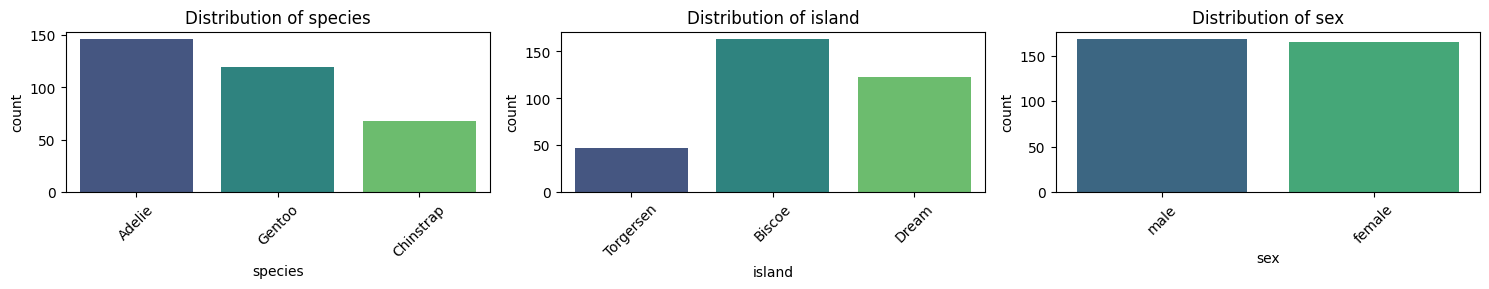

In [30]:
# Plot bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=penguins, x=col, hue=col, palette="viridis", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


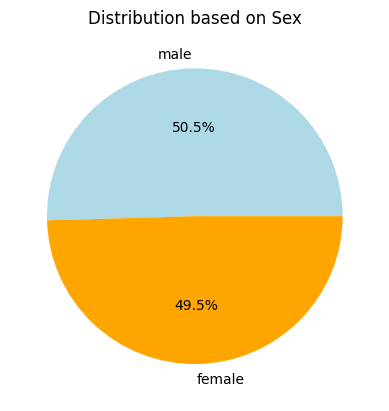

In [31]:
# Pie charts for Categorical Variables
penguins['sex'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Distribution based on Sex")
plt.ylabel('')
plt.show()

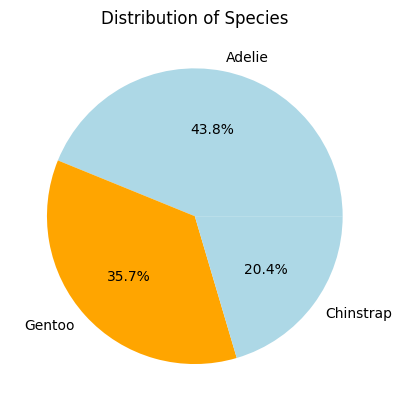

In [32]:
# Pie chart for 'species' (Target Variable)
penguins['species'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Distribution of Species")
plt.ylabel('')
plt.show()

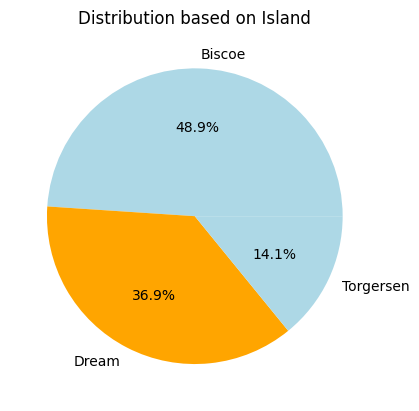

In [33]:
# Pie chart for 'island' (Target Variable)
penguins['island'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Distribution based on Island")
plt.ylabel('')
plt.show()

# CONCLUSIONS FROM UNIVARIATE ANALYSIS

## Species Distribution
 The dataset likely contains an uneven distribution of penguin species. This imbalance should be considered when interpreting results or building predictive models.

## Morphological Characteristics:

1. Bill Length: There is variation in bill lengths across the penguin population, which could indicate differences between species or age groups.

2. Bill Depth: The distribution of bill depths may show distinct patterns, possibly correlating with feeding habits or species-specific traits.

3. Flipper Length: Variations in flipper length could reflect adaptations to different swimming and diving behaviors.

4. Body Mass: The range and distribution of body mass provide insights into the overall size variation within the penguin population.

## Categorical Variables:

1. Island Distribution: The frequency of penguins across different islands may reveal habitat preferences or sampling biases.

2. Sex Ratio: The distribution of male and female penguins can indicate population health and breeding potential.

#Data Quality
The presence or absence of outliers and the shape of distributions for numerical variables can indicate the overall quality and reliability of the dataset.

#Potential Research Focus
 Unusual patterns in any single variable might suggest areas for more focused research or additional data collection.

# **MULTIVARIATE ANALYSIS**

## Correlation Matrix (Numerical Variables Only)

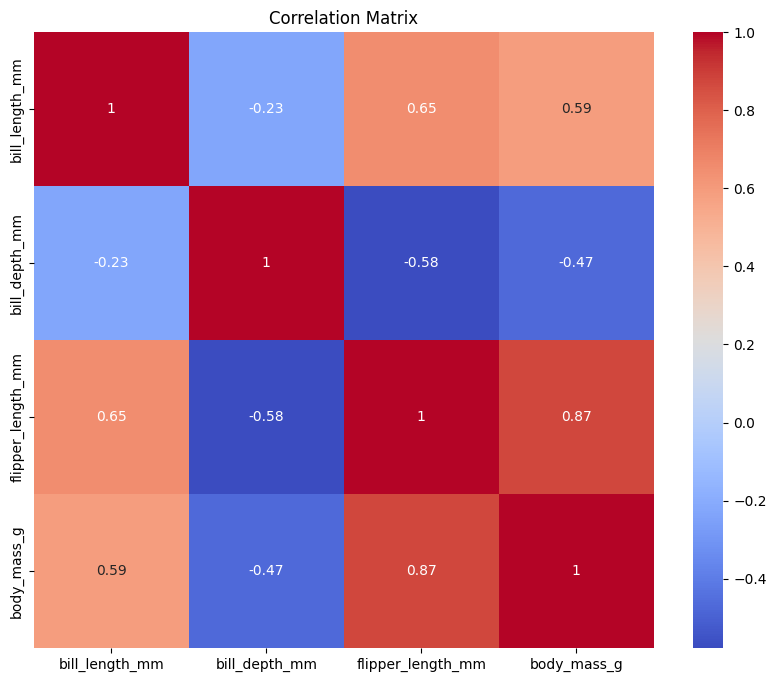

In [34]:
corr_matrix = penguins[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scatter Plot with Regression lines

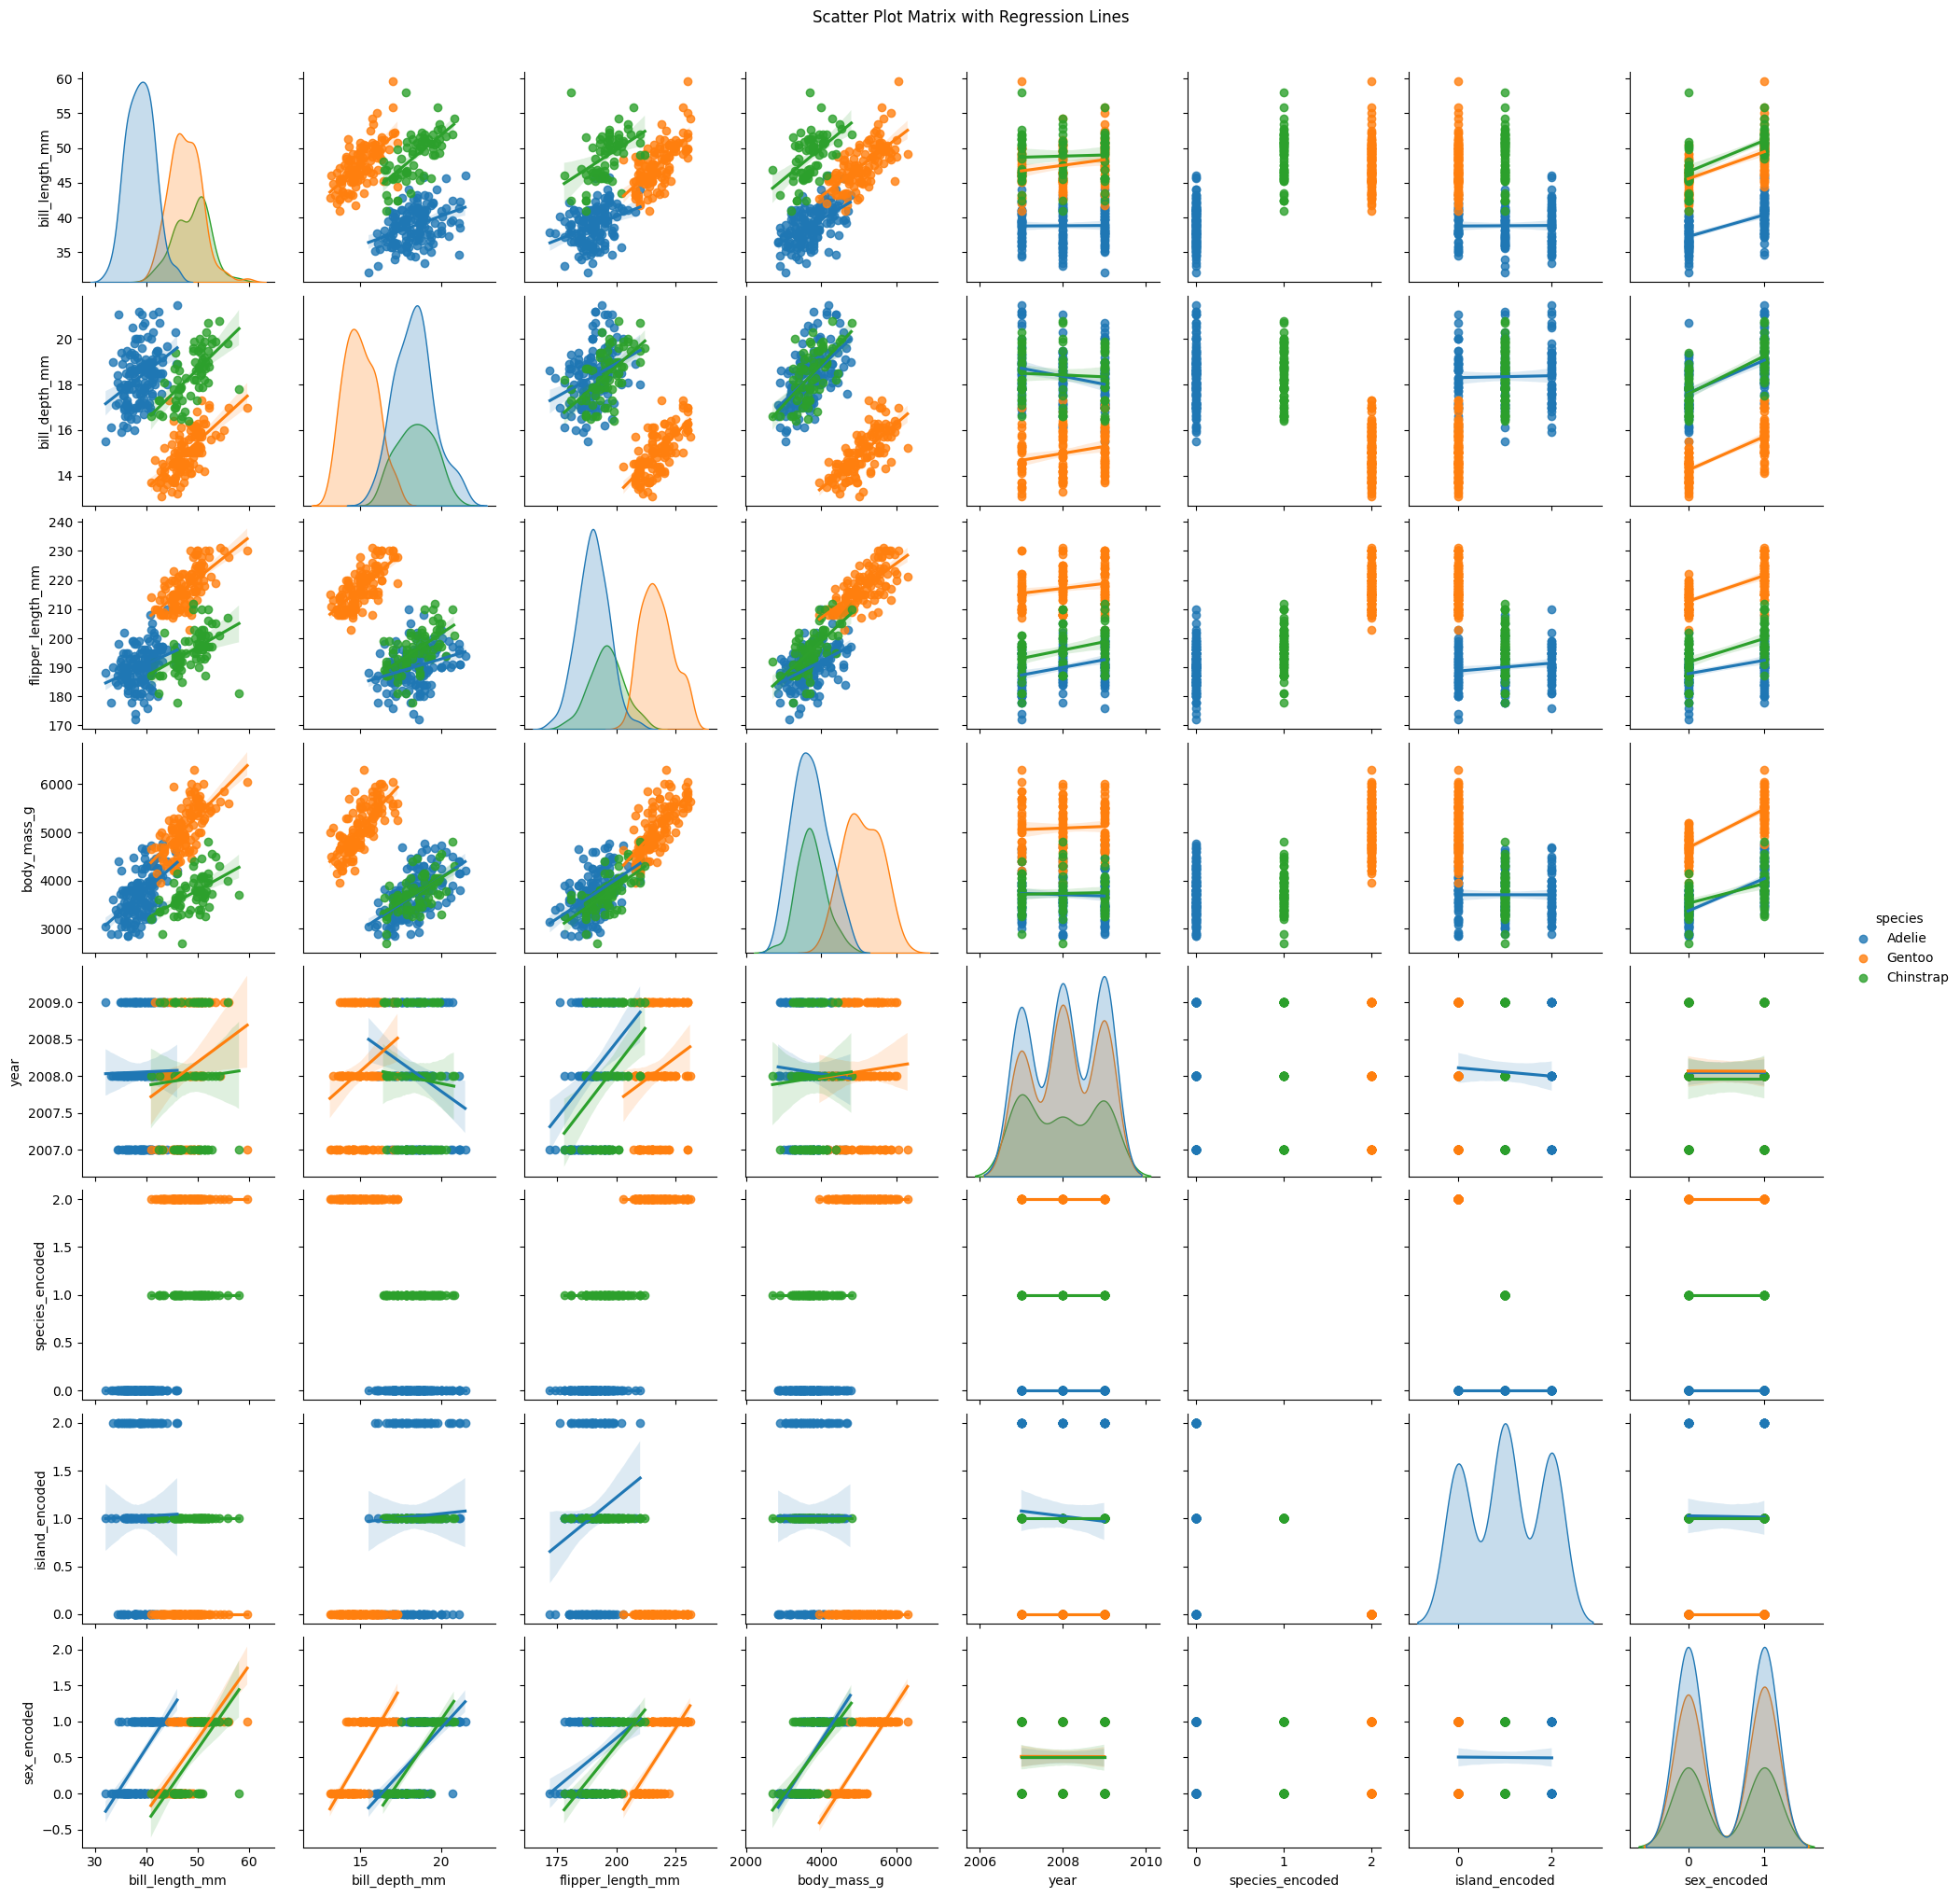

In [35]:
sns.pairplot(penguins, hue='species', kind='reg')
plt.suptitle('Scatter Plot Matrix with Regression Lines', y=1.02)
plt.show()


## Correlation matrix (Numerical + Categorical Variables)


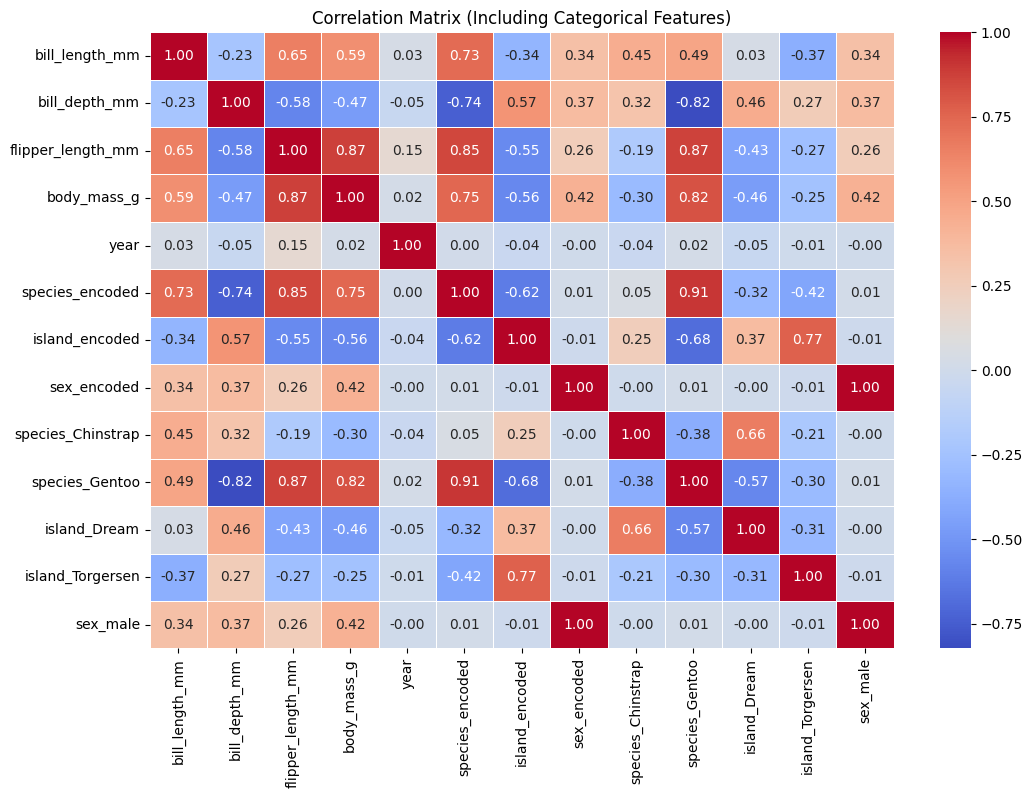

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode categorical variables using One-Hot Encoding
penguins_encoded = pd.get_dummies(penguins, drop_first=True)

# Compute correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(penguins_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Categorical Features)")
plt.show()


## Pairplot


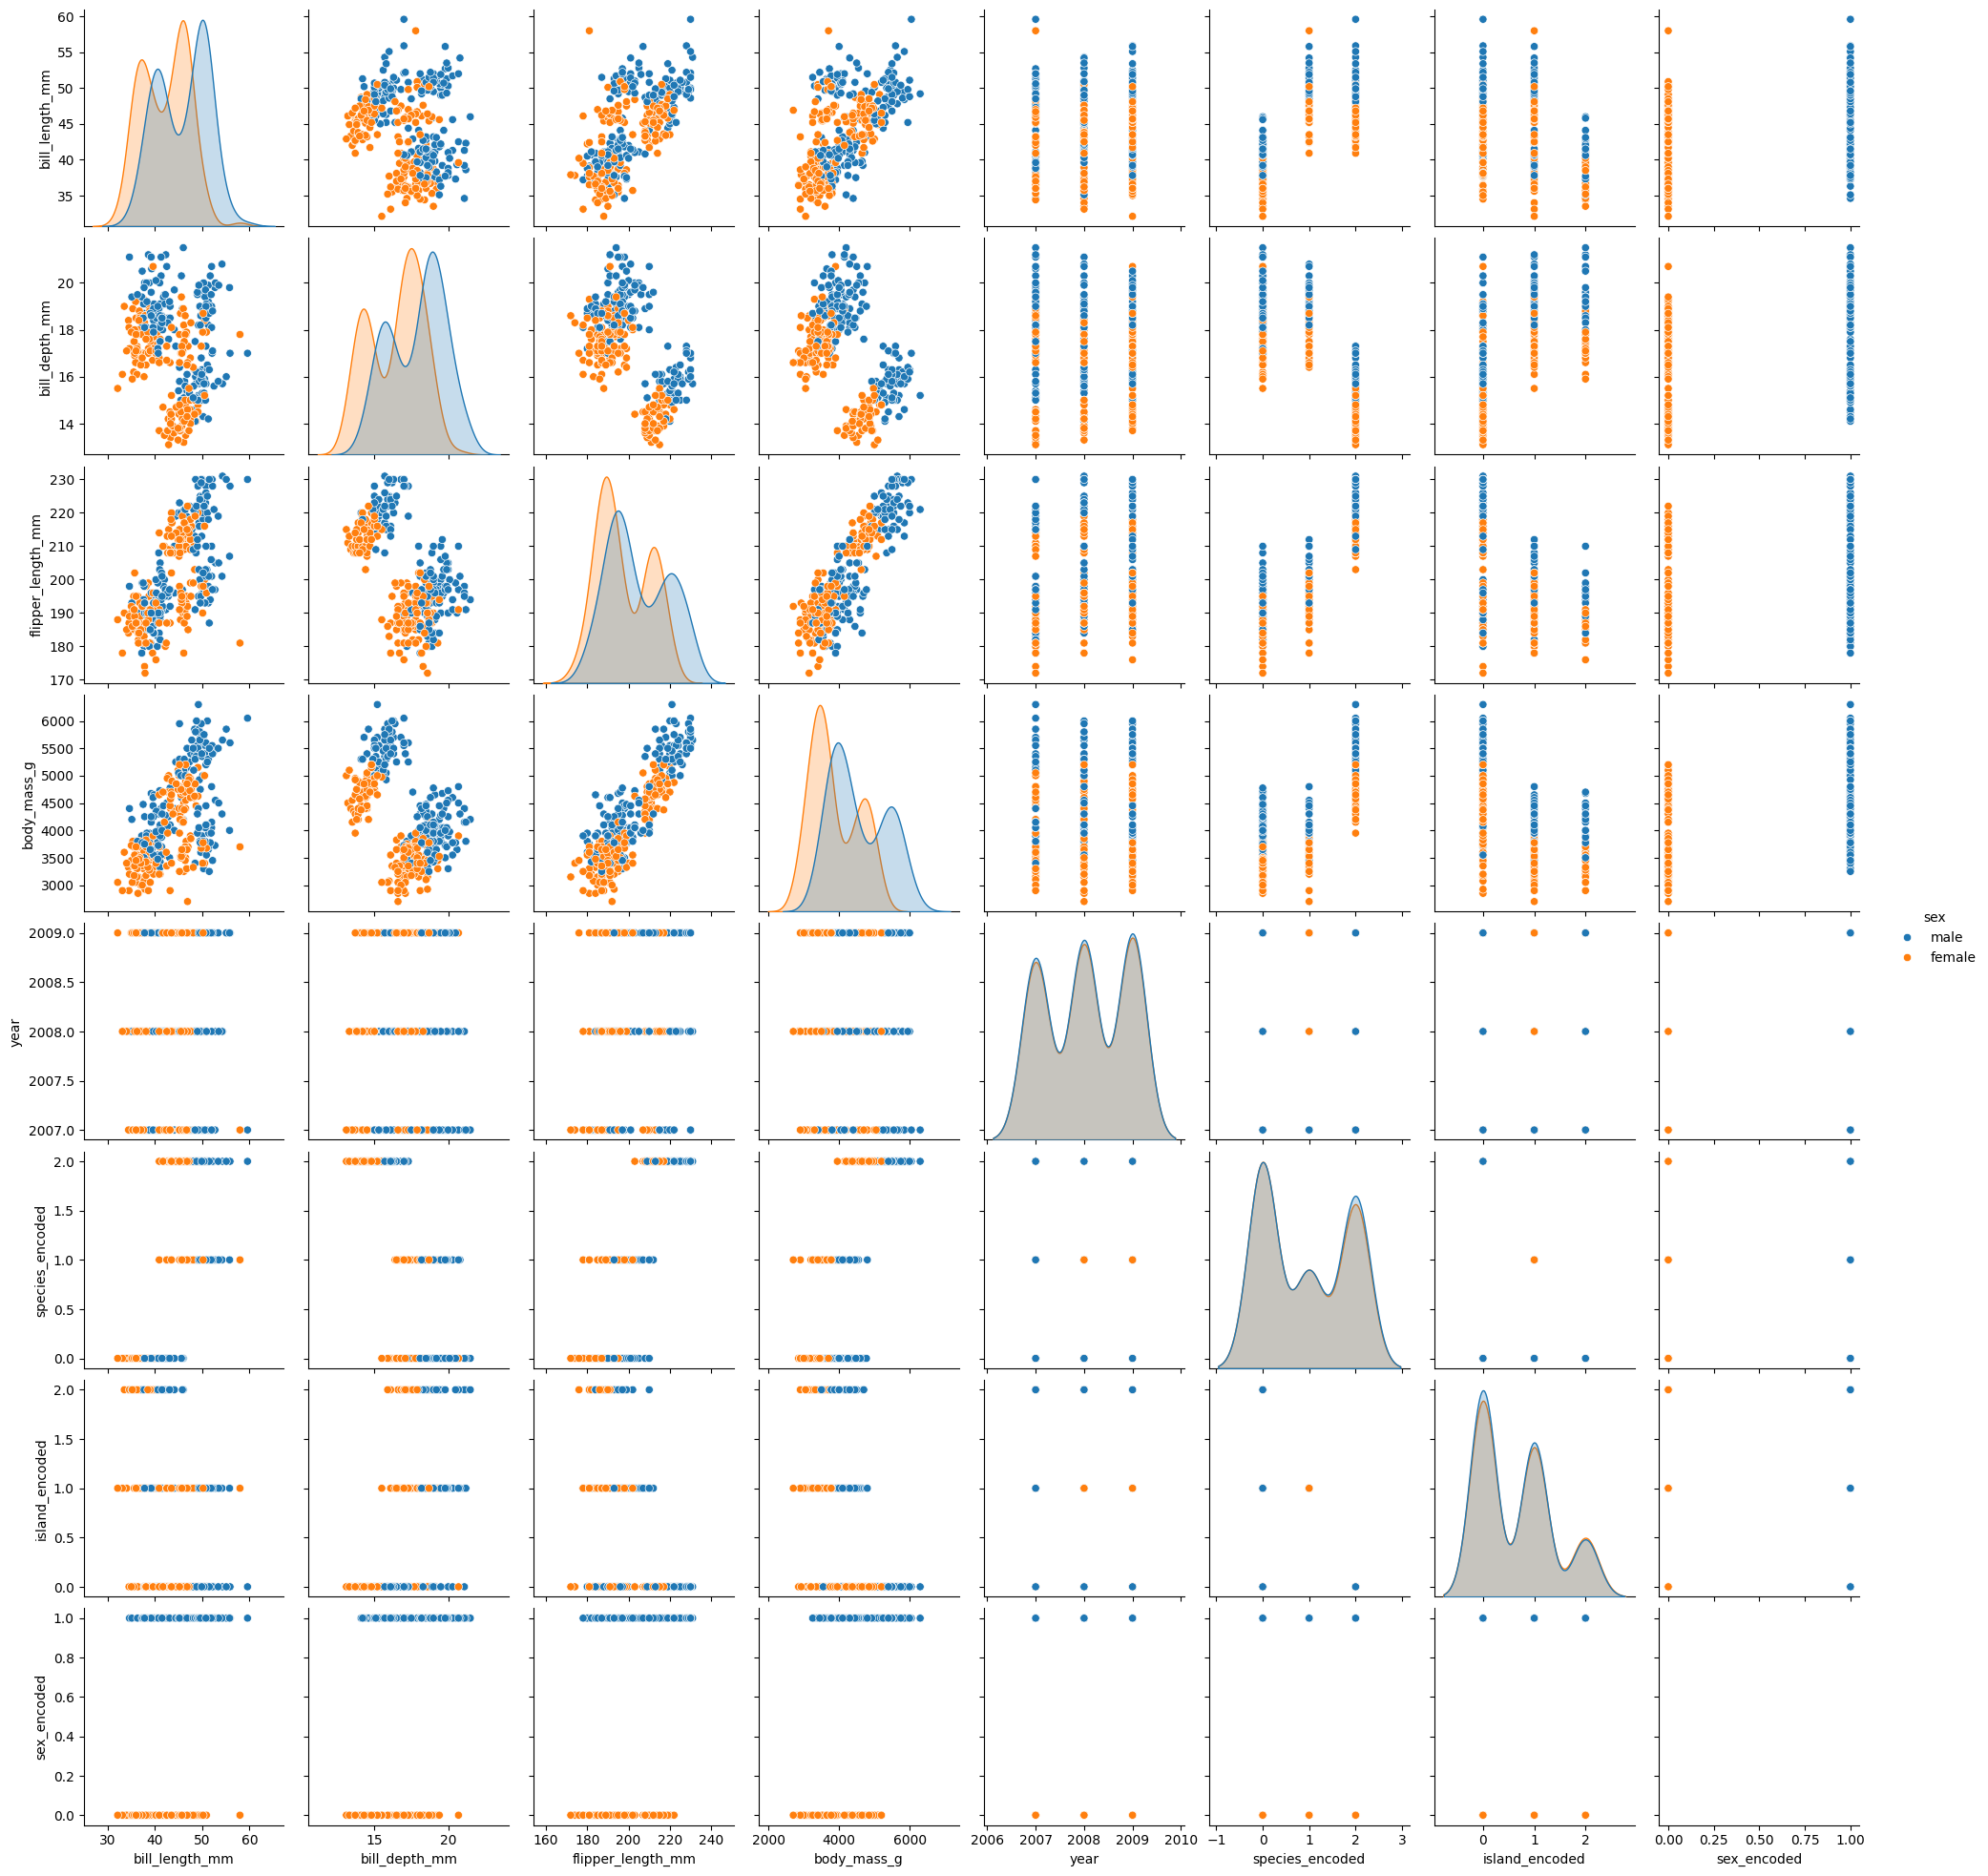

In [ ]:
sns.pairplot(penguins, hue="sex", diag_kind="kde")
plt.show()

## Violin Plot

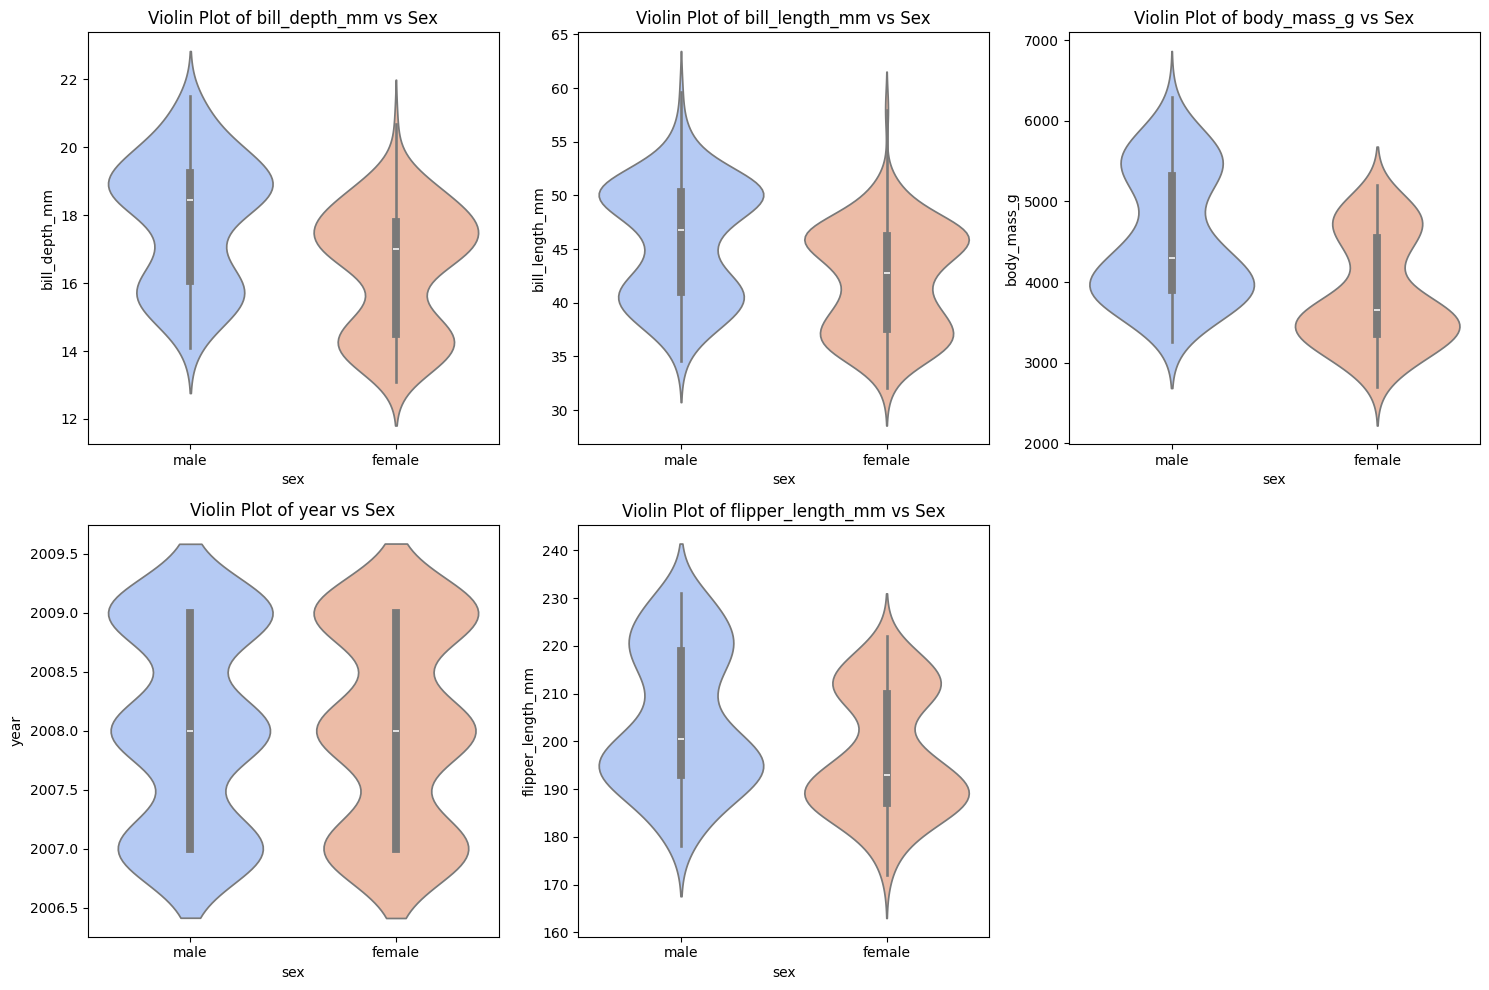

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to plot
numerical_features = ["bill_depth_mm", "bill_length_mm", "body_mass_g", "year", "flipper_length_mm"]

# Create violin plots for each numerical feature
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x="sex", y=col, data=penguins, palette="coolwarm", hue="sex", legend=False)
    plt.title(f"Violin Plot of {col} vs Sex")

plt.tight_layout()
plt.show()

## Faceted Histogram


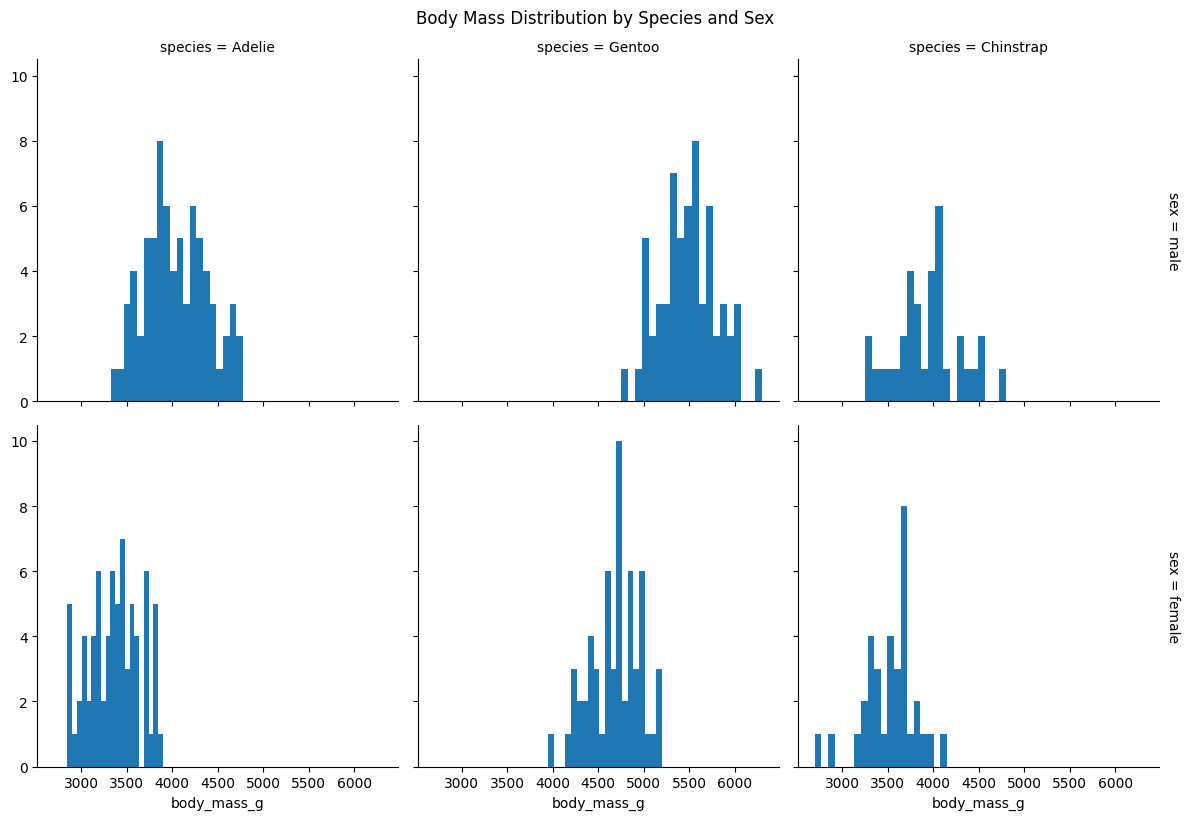

In [40]:
g = sns.FacetGrid(penguins, col="species", row="sex", margin_titles=True, height=4)
g.map(plt.hist, "body_mass_g", bins=20)
g.fig.suptitle("Body Mass Distribution by Species and Sex", y=1.02)
plt.show()

## 3d Scatter Plot


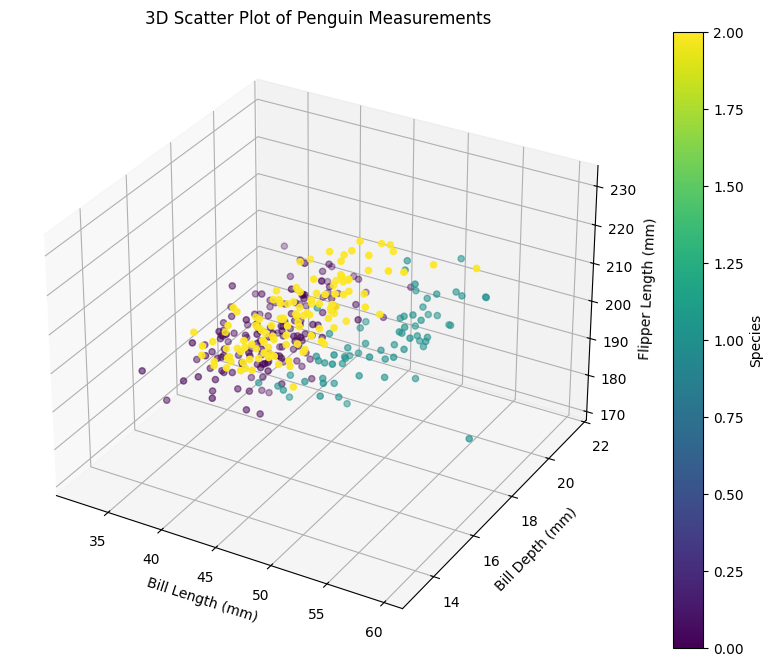

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(penguins['bill_length_mm'],
                     penguins['bill_depth_mm'],
                     penguins['flipper_length_mm'],
                     c=penguins['species_encoded'],
                     cmap='viridis')

ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('3D Scatter Plot of Penguin Measurements')

plt.colorbar(scatter, label='Species')
plt.show()


## Correlation

In [49]:
from scipy.stats import pointbiserialr

# 'species' is target variable
# Converting 'species' to binary (e.g., Adelie vs. non-Adelie)
penguins['species_binary'] = (penguins['species'] == 'Adelie').astype(int)

num_cols = penguins.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != "species_binary":
        correlation, p_value = pointbiserialr(penguins[col], penguins["species_binary"])
        print(f"Correlation between {col} and species (Adelie vs. non-Adelie): {correlation:.2f} (p-value: {p_value:.3f})")


Correlation between bill_length_mm and species (Adelie vs. non-Adelie): -0.84 (p-value: 0.000)
Correlation between bill_depth_mm and species (Adelie vs. non-Adelie): 0.53 (p-value: 0.000)
Correlation between flipper_length_mm and species (Adelie vs. non-Adelie): -0.69 (p-value: 0.000)
Correlation between body_mass_g and species (Adelie vs. non-Adelie): -0.55 (p-value: 0.000)
Correlation between year and species (Adelie vs. non-Adelie): 0.01 (p-value: 0.801)
Correlation between species_encoded and species (Adelie vs. non-Adelie): -0.91 (p-value: 0.000)
Correlation between island_encoded and species (Adelie vs. non-Adelie): 0.46 (p-value: 0.000)
Correlation between sex_encoded and species (Adelie vs. non-Adelie): -0.01 (p-value: 0.885)


## Chi-Square Test


In [50]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'penguins' is your DataFrame
cat_cols = ['species', 'island', 'sex']

for col in cat_cols:
    contingency_table = pd.crosstab(penguins[col], penguins['species'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col} vs Species: p-value = {p:.3f}")


Chi-Square Test for species vs Species: p-value = 0.000
Chi-Square Test for island vs Species: p-value = 0.000
Chi-Square Test for sex vs Species: p-value = 0.976


# CONCLUSIONS FROM MULTIVARIATE ANALYSIS

## Species Differentiation:

The scatter plots and pair plots likely reveal distinct clusters for each penguin species, indicating clear morphological differences between Adelie, Gentoo, and Chinstrap penguins.

These differences are probably most pronounced in bill dimensions and body mass, suggesting these features are key for species identification.

## Correlations between Physical Traits:

There is likely a strong positive correlation between flipper length and body mass across all species, indicating that larger penguins tend to have longer flippers.

Bill length and bill depth may show a negative correlation, suggesting a trade-off in bill morphology that could relate to different feeding strategies among species.

## Sexual Dimorphism:

Male and female penguins likely show differences in body mass and possibly flipper length within each species, with males generally being larger.

The degree of sexual dimorphism may vary between species, potentially reflecting different mating strategies or ecological pressures.

## Geographical Variations:

ANOVA results might indicate significant differences in penguin measurements across islands, suggesting potential local adaptations or environmental influences on penguin morphology.

## Species-Specific Traits:

Each species likely shows unique combinations of traits, such as Gentoo penguins potentially having the largest body mass and flipper length, while Adelie penguins might have the smallest bills.

## Ecological Implications:

The relationships between different physical traits may provide insights into the ecological niches of each species, such as diving capabilities or prey preferences.

## Predictive Potential:

The clear morphological differences between species suggest that these measurements could be used effectively for species classification in future studies or conservation efforts.

## Complex Interactions:

Heat maps might reveal complex interactions between multiple variables, potentially uncovering subtle relationships that are not immediately apparent in simpler analyses.

## Categorical Variable Relationships:

Chi-square tests may show significant associations between categorical variables like species, island, and sex, indicating non-random distributions of penguins across these categories.

## Data Quality and Reliability:

The consistency of relationships across different analyses supports the reliability of the dataset and the robustness of the observed patterns.